In [6]:
from pathlib import Path

import pandas

keywords_path = Path("/home/sasce/PycharmProjects/CodeGraphClassification/data/processed/keywords/rake/all")

keywords_files = list(keywords_path.glob("*.csv"))

In [27]:
from multiset import Multiset

keywords = {}
keywords_set = {}

for keywords_file in keywords_files:
    label = keywords_file.stem
    df = pandas.read_csv(keywords_file)
    keywords[label] = set(df['keyword'].tolist())
    keywords_set[label] = Multiset(dict(zip(df['keyword'].tolist(), df['frequency'].tolist())))

In [28]:
from collections import Counter

count = Counter()

for label in keywords:
    count.update(keywords[label])

In [29]:
len(count.most_common())

1196

In [31]:
keywords_count_topic = pandas.DataFrame(count.most_common(2000), columns=["Topic", "Count"])

<AxesSubplot: xlabel='Topic', ylabel='Count'>

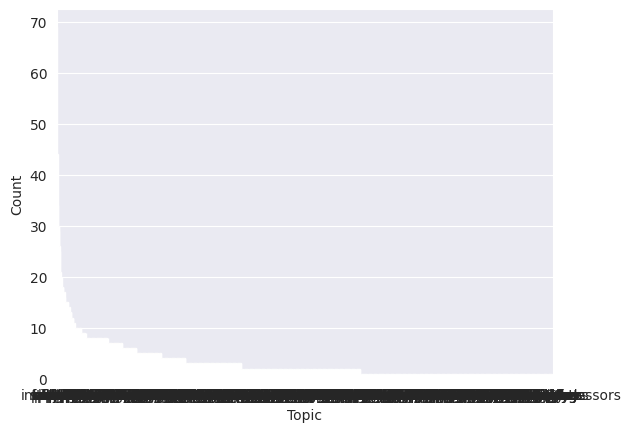

In [32]:
import seaborn
seaborn.barplot(data=keywords_count_topic, x="Topic", y="Count")

In [54]:
import numpy

mapping = {k.stem:v for v, k in enumerate(keywords_files)}
labels = {v:k.stem for v, k in enumerate(keywords_files)}

In [55]:
from itertools import combinations

pairs = list(combinations(mapping.keys(), 2))

In [58]:
n = len(keywords_files)
intersections = numpy.zeros((n, n))
for a, b in pairs:
    ai = mapping[a]
    bi = mapping[b]
    int = len(keywords_set[a].intersection(keywords_set[b]))
    intersections[ai, bi] = int

<AxesSubplot: >

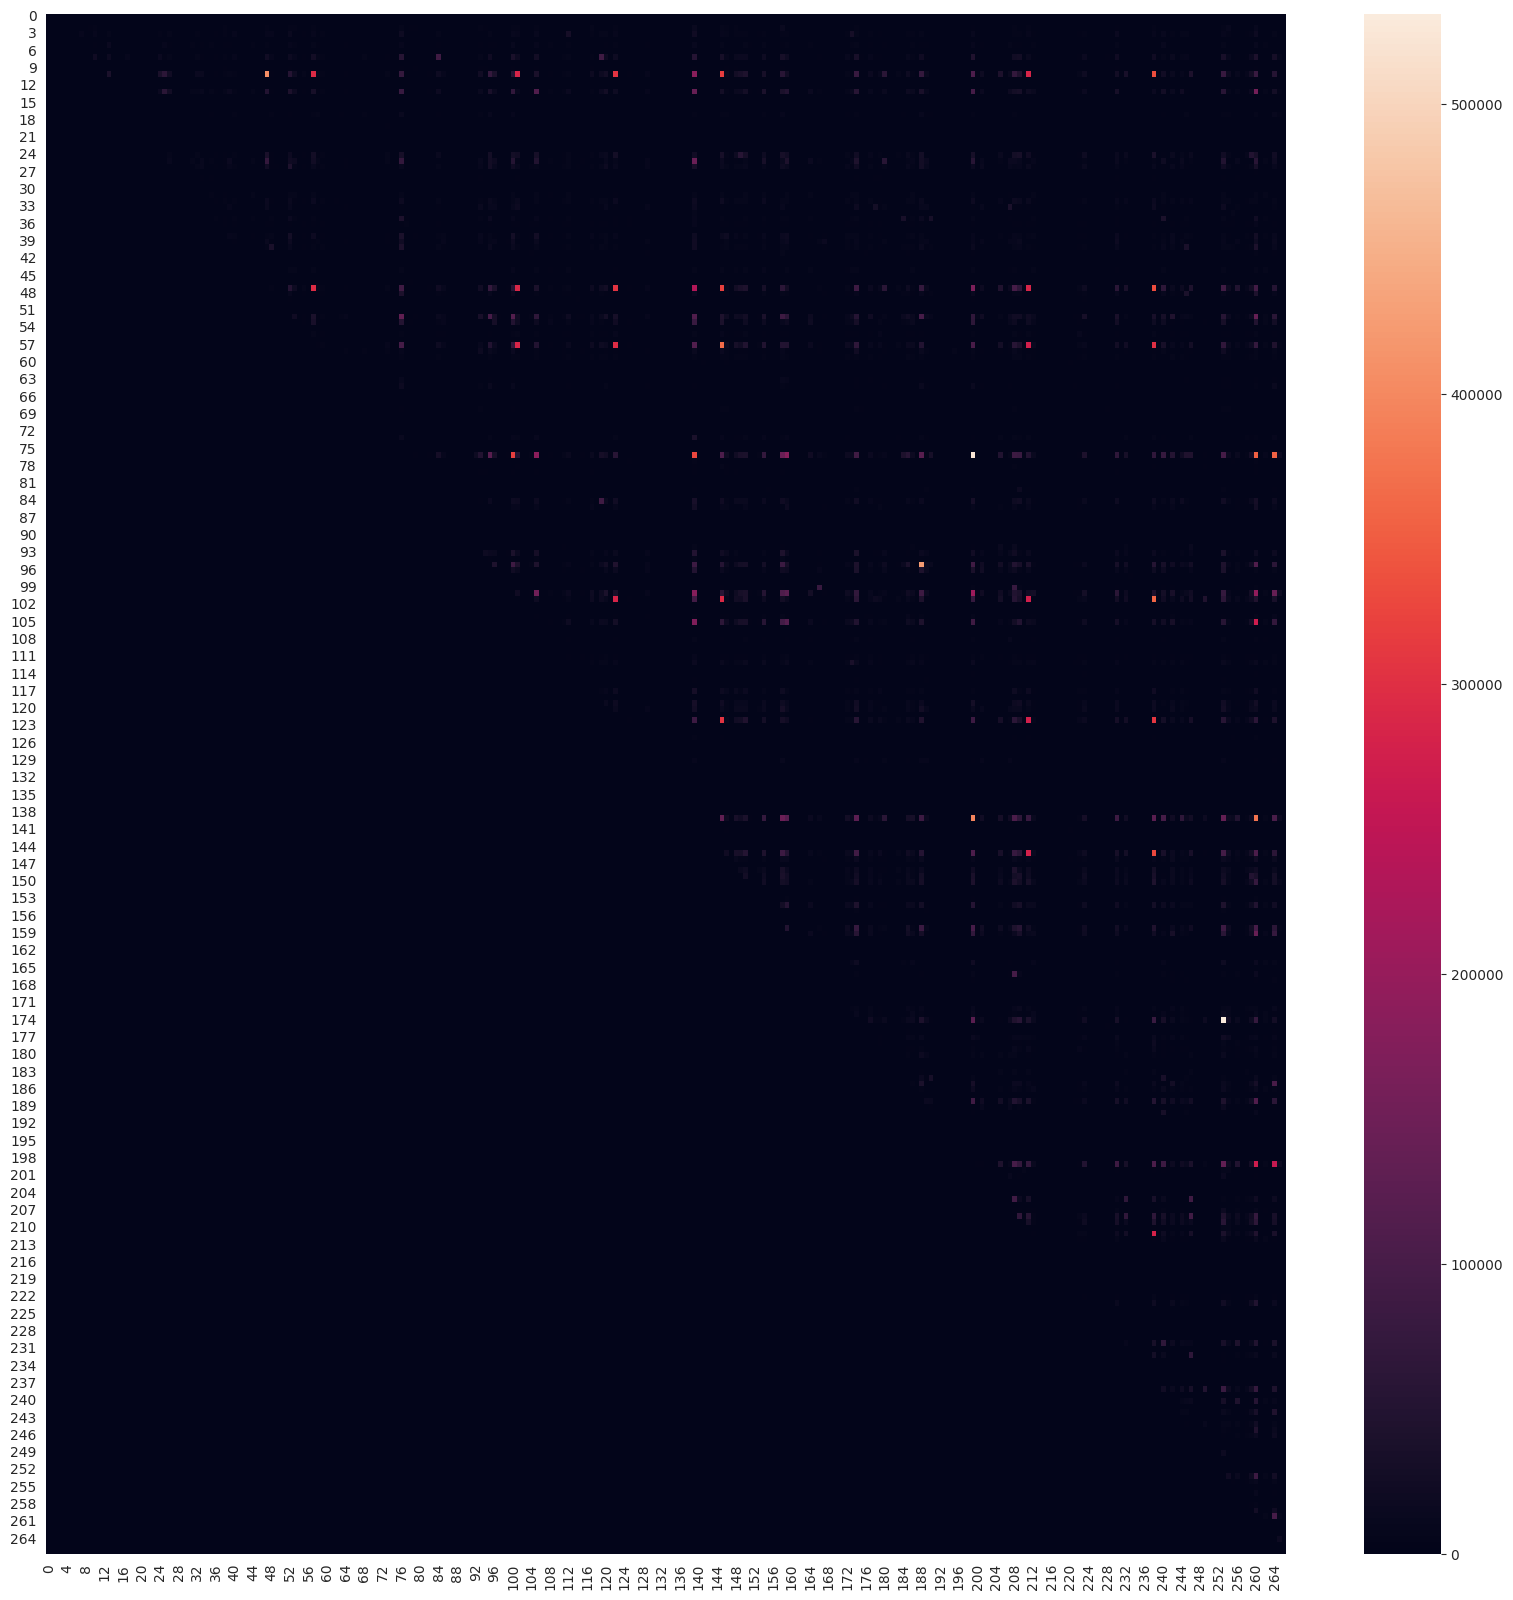

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
seaborn.heatmap(intersections)

In [20]:
max_index = numpy.unravel_index(intersections.argmax(), intersections.shape)

In [35]:
max_index

(174, 253)

In [36]:
intersections[max_index]

119.0

In [37]:
labels[95]

'website'

In [38]:
labels[188]

'World Wide Web'

In [119]:
limit = 10

keep_keywords = [x[0] for x in count.most_common() if limit > x[1] > 3]

In [120]:
from os.path import join

keywords = {}
out = Path("/home/sasce/PycharmProjects/CodeGraphClassification/data/processed/keywords/filtered")
for keywords_file in keywords_files:
    label = keywords_file.stem
    df = pandas.read_csv(keywords_file)
    df = df[df['keyword'].isin(keep_keywords)]
    df.to_csv(join(out, f"{keywords_file.stem}.csv"), index=False)